In [1]:
import sys
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt
import numpy as np
import cv2
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

C:\Users\mk35684\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
#Import image collection
#You will need to change 'Pics/*.jpg' to match your image directory
images = skimage.io.imread_collection('Pics/*.jpg')

In [3]:
#Create separate histogram of each color
redhist=cv2.calcHist(images,[0],None,[256],[0,256])
greenhist=cv2.calcHist(images,[1],None,[256],[0,256])
bluehist=cv2.calcHist(images,[2],None,[256],[0,256])

In [4]:
#Utilize existing colormaps to get gradient matching pixel intensity
blues=cm.get_cmap('Blues',256)
blueslist=blues(np.linspace(1,0,256))

reds=cm.get_cmap('Reds',256)
redslist=reds(np.linspace(1,0,256))

greens=cm.get_cmap('Greens',256)
greenslist=greens(np.linspace(1,0,256))

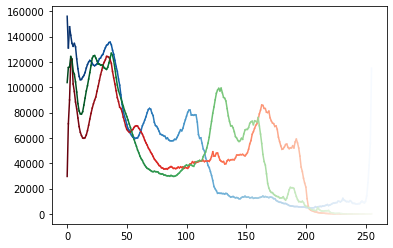

In [5]:
#Plot histograms as lines
for i in range(1,256):
    plt.plot((i-1,i),(bluehist[i-1],bluehist[i]),color=blueslist[i-1])
    plt.plot((i-1,i),(redhist[i-1],redhist[i]),color=redslist[i-1])
    plt.plot((i-1,i),(greenhist[i-1],greenhist[i]),color=greenslist[i-1])

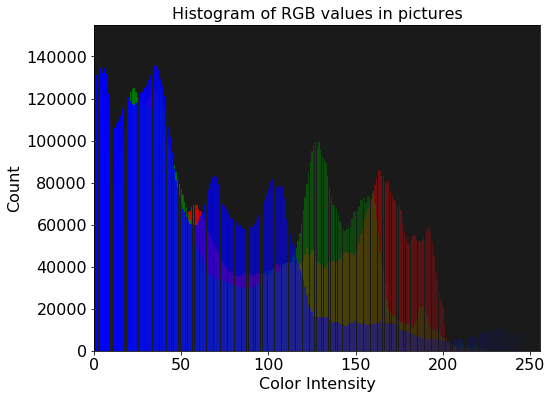

In [6]:
#Plot histograms as bar charts using alpha to delinate different intensities
intensity=np.linspace(1,0,256)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8, 6))
ax.set_facecolor([.1, .1, .1])
plt.xlim(0,256)
for i in range(1,256):
    plt.bar(i,redhist[i],color='red',alpha=intensity[i])
    plt.bar(i,greenhist[i],color='green',alpha=intensity[i])
    plt.bar(i,bluehist[i],color='blue',alpha=intensity[i])


plt.ylabel('Count',fontsize=16)
plt.xlabel('Color Intensity',fontsize=16)
plt.title('Histogram of RGB values in pictures',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

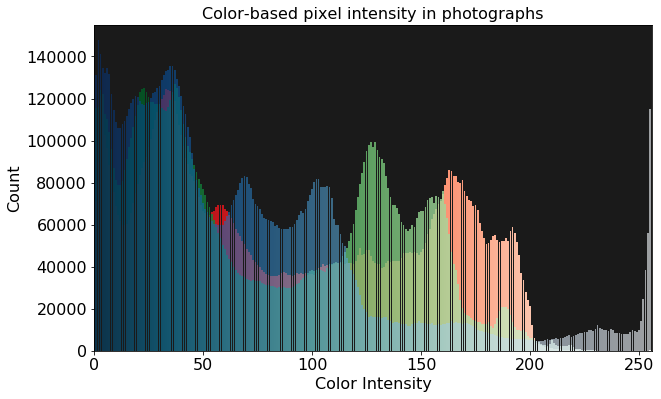

In [7]:
#Plot histograms as bar chart using the colormaps to delineate intensities
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10, 6))
ax.set_facecolor([.1, .1, .1])
plt.xlim(0,256)
for i in range(1,256):
    plt.bar(i,redhist[i],color=redslist[i-1],alpha=1)
    plt.bar(i,greenhist[i],color=greenslist[i-1],alpha=0.8)
    plt.bar(i,bluehist[i],color=blueslist[i-1],alpha=.6)


plt.ylabel('Count',fontsize=16)
plt.xlabel('Color Intensity',fontsize=16)
plt.title('Color-based pixel intensity in photographs',fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()
